1.Download the dataset

2.Load the dataset 

In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv('Mall_Customers.csv')
dataframe.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Dataset is loaded

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
dataframe.rename(columns = {'Annual Income (k$)':'annual_income'}, inplace = True)

In [5]:
dataframe.rename(columns = {'Spending Score (1-100)':'spending_score'}, inplace = True)

3.Visualizations ( Univariant , Bivariant , Multivariant )

A.Univariant Analysis

In [6]:
dataframe["annual_income"].mean()

60.56

In [7]:
dataframe["annual_income"].std()

26.264721165271244

In [8]:
dataframe['annual_income'].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: annual_income, Length: 64, dtype: int64

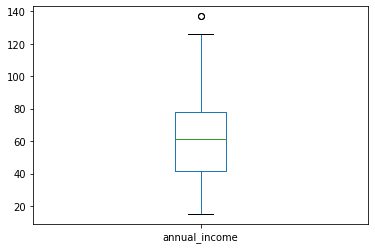

In [9]:
import matplotlib.pyplot as plt
dataframe.boxplot(column=['annual_income'],grid=False)

B.Bivariant Analysis

Text(0, 0.5, 'Annual Income')

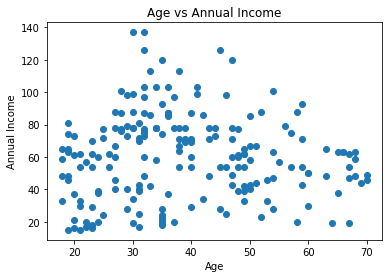

In [10]:
plt.scatter(dataframe.Age,dataframe.annual_income)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')

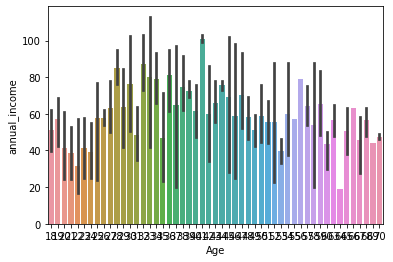

In [11]:
import seaborn as sns
sns.barplot(x='Age',y='annual_income',data = dataframe)

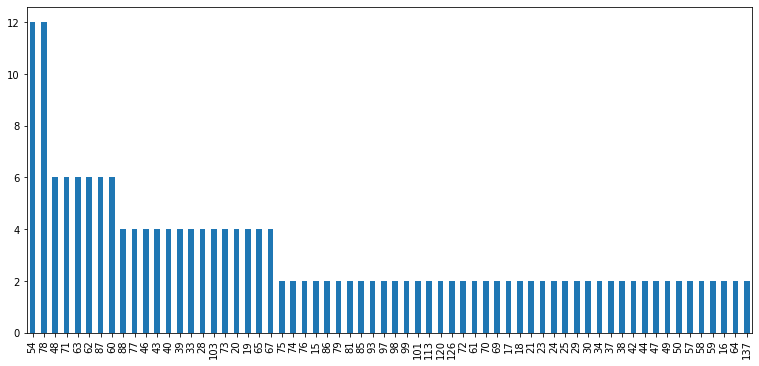

In [12]:
dataframe['annual_income'].value_counts().plot.bar(figsize = (13, 6))

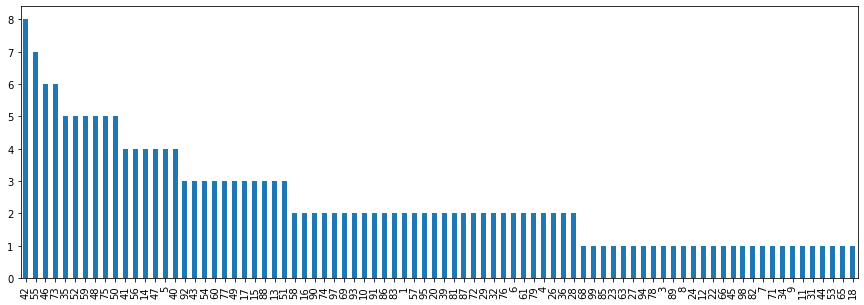

In [13]:
dataframe['spending_score'].value_counts().plot.bar(figsize = (15, 5))

C.Multi-Variate Analysis

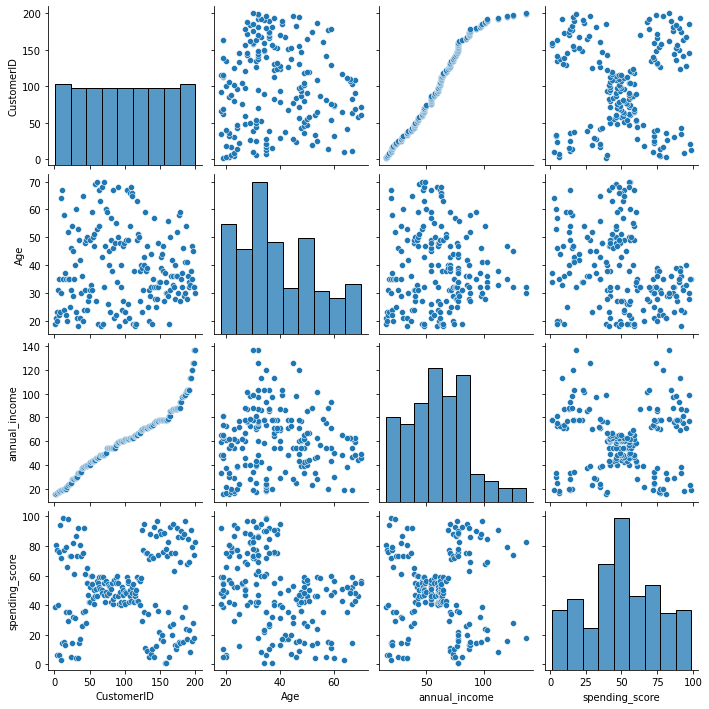

In [14]:
sns.pairplot(dataframe)

4. Perform descriptive statistics on the dataset

In [15]:
dataframe.corr()

,CustomerID,Age,annual_income,spending_score
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
annual_income,0.977548,-0.012398,1.000000,0.009903
spending_score,0.013835,-0.327227,0.009903,1.000000


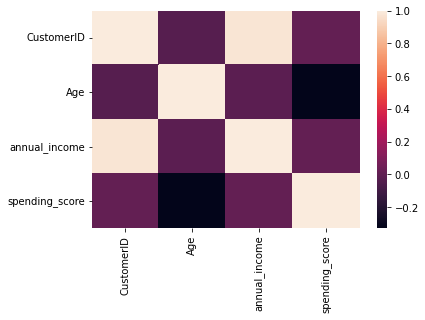

In [16]:
sns.heatmap(dataframe.corr())

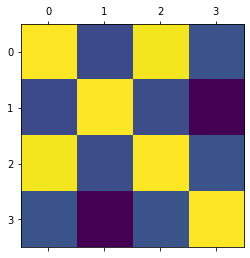

In [17]:
plt.matshow(dataframe.corr())

5.Check for Missing values and deal with them.

In [18]:
dataframe.isnull().any()

CustomerID        False
Gender            False
Age               False
annual_income     False
spending_score    False
dtype: bool

There are no missing values in this dataset . So there is no need to handle the missing values .

6.Find the outliers and replace them outliers

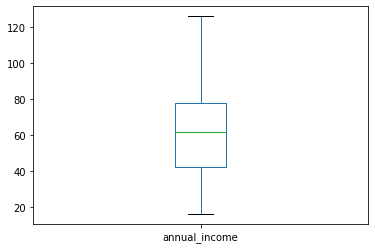

In [19]:
q_low = dataframe["annual_income"].quantile(0.01)
q_hi  = dataframe["annual_income"].quantile(0.99)

df_filtered = dataframe[(dataframe["annual_income"] < q_hi) & (dataframe["annual_income"] > q_low)]
df_filtered.boxplot(column=['annual_income'],grid=False)

7.Check for Categorical columns and perform encoding.

In [20]:
dataframe["Gender"]

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

In [21]:
from sklearn import preprocessing

In [22]:
label_encoder = preprocessing.LabelEncoder()
dataframe['Gender'] = label_encoder.fit_transform(dataframe['Gender'])  

In [23]:
dataframe["Gender"]

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

8.Split the data into dependent and independent variables.

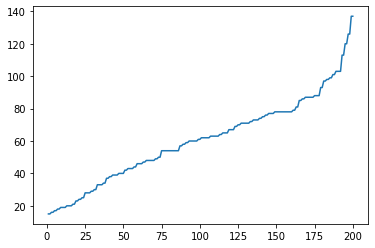

In [24]:
x = dataframe['CustomerID']
y = dataframe['annual_income']

plt.plot(x, y)

In [25]:
x = dataframe.iloc[:, [3, 4]].values

print(x.shape)

(200, 2)


9. Perform any of the clustering algorithms

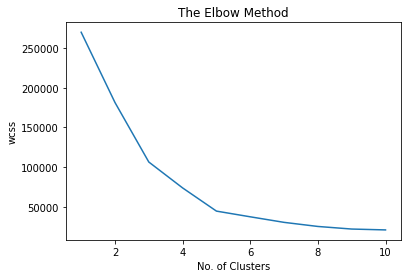

In [26]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)
  
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

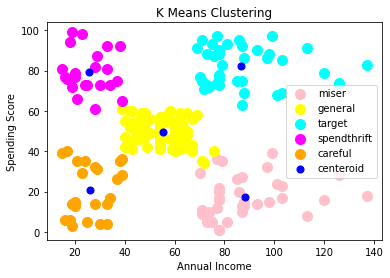

In [27]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

11. Split the data into dependent and independent
variables.


In [28]:
df1=dataframe[["CustomerID","Gender","Age","annual_income","spending_score"]]
X=df1[["annual_income","spending_score"]]

12. Split the data into training and testing
13. Build the Model

In [30]:
X.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


14. Train the Model

In [29]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

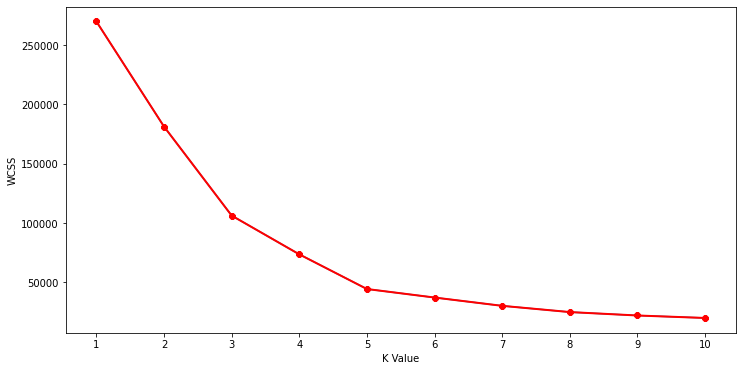

In [31]:
import numpy as np
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

15. Test the Model

In [32]:
km1=KMeans(n_clusters=5)
km1.fit(X)
y=km1.predict(X)
df1["label"] = y
df1.head()

,CustomerID,Gender,Age,annual_income,spending_score,label
0,1,1,19,15,39,2
1,2,1,21,15,81,1
2,3,0,20,16,6,2
3,4,0,23,16,77,1
4,5,0,31,17,40,2


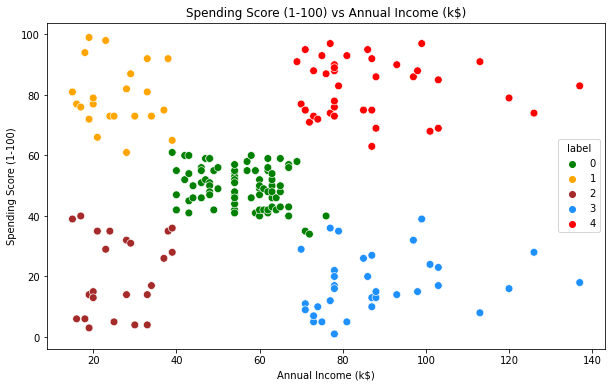

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'annual_income',y = 'spending_score',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

16. Measure the performance using Evaluation Metrics

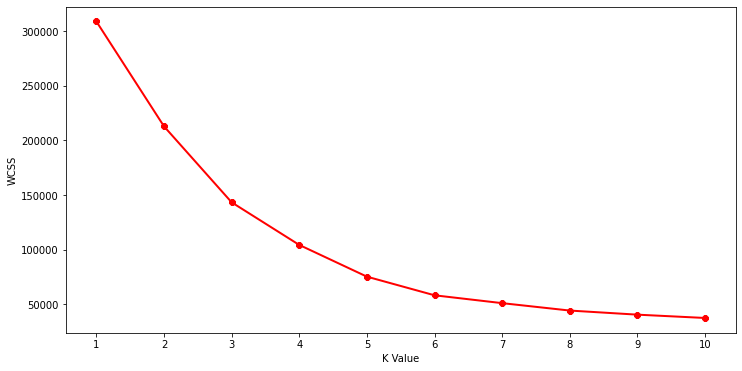

In [34]:
X2=df1[["Age","annual_income","spending_score"]]
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [35]:
cust1=df1[df1["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df1[df1["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df1[df1["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df1[df1["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df1[df1["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
--------------------------------------------
Number of customer in 2nd group= 23
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]
--------------------------------------------
Number of customer in 3rd group= 81
They are - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]
--------------------------------------------
Number of customer in 4th group= 35
They are - [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
--------------------------------------------
Number of customer i